<a href="https://colab.research.google.com/github/Alexsinator/Challenge_Alura_Store_Alex/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [61]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [62]:
print(tienda)

# Notas de cantidad de facturas por tienda
#   tienda    2359 filas x 12 columnas
#   tienda2   2359 filas x 12 columnas
#   tienda3   2359 filas x 12 columnas
#   tienda4   2358 filas x 12 columnas

               Producto Categoría del Producto     Precio  Costo de envío  \
0     Asistente virtual           Electrónicos   164300.0          6900.0   
1       Mesa de comedor                Muebles   192300.0          8400.0   
2         Juego de mesa               Juguetes   209600.0         15900.0   
3            Microondas      Electrodomésticos   757500.0         41000.0   
4      Silla de oficina                Muebles   335200.0         20200.0   
...                 ...                    ...        ...             ...   
2354          Iphone 15           Electrónicos  1284400.0         66600.0   
2355          Impresora           Electrónicos   282800.0         15300.0   
2356      Juego de mesa               Juguetes   122900.0          7200.0   
2357           Cama box                Muebles   691300.0         35000.0   
2358         Smartwatch           Electrónicos   195000.0          8600.0   

     Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0   


La facturacion por tienda es: 
{'Tienda': 1150880400.0, 'Tienda2': 1116343500.0, 'Tienda3': 1098019600.0, 'Tienda4': 1038375700.0}

La facturación global de las tiendas es de: R 4403619200.0


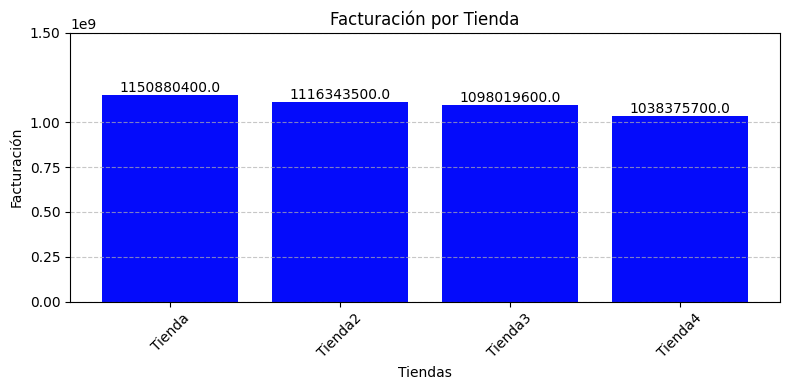

In [63]:
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

tiendas = [tienda, tienda2, tienda3, tienda4]
facturacion_por_tienda = [sum(tienda['Precio']) for tienda in [tienda,tienda2,tienda3,tienda4]] # Suma de la facturación por tienda.

nombres_tiendas = ['Tienda', 'Tienda2', 'Tienda3', 'Tienda4']                 # Nombre por tienda.
facturacion_y_tienda = dict(zip(nombres_tiendas, facturacion_por_tienda))     # Union de tienda con su facturación.
print(f'\nLa facturacion por tienda es: \n{facturacion_y_tienda}')

facturacion_global = sum(facturacion_por_tienda)                              #Suma el total de facturacion de la tienda.
print(f'\nLa facturación global de las tiendas es de: R {facturacion_global}')

plt.figure(figsize=(8, 4))
bars1 = plt.bar(facturacion_y_tienda.keys(), facturacion_y_tienda.values(),color='#040BFB')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por Tienda')
plt.xticks(rotation=45)
plt.yticks([0,250000000,500000000,750000000, 1000000000, 1500000000])
plt.grid(axis='y', linestyle= '--', alpha=0.7)

for bar in bars1:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


plt.tight_layout()
plt.savefig('grafico_facturacion_por_tiendas.png')
plt.show()

# print(os.listdir())                                     #Asegurar que se guardara la imagen
# display(Image('grafico_facturacion_por_tiendas.png'))   #Verificamos que se muestre la imagen

# 2. Ventas por categoría

In [65]:
import pandas as pd

prueba_tiendas = pd.concat(tiendas, ignore_index=True)
# Encontrar cuales y cuantas categorias de producto hay en las tiendas.
categorias = sorted(prueba_tiendas['Categoría del Producto'].dropna().unique().tolist())


print(f'Las categorias son las siguientes: ')
for categoria in categorias:
    print(f'\t{categoria}')

Las categorias son las siguientes: 
	Artículos para el hogar
	Deportes y diversión
	Electrodomésticos
	Electrónicos
	Instrumentos musicales
	Juguetes
	Libros
	Muebles


In [66]:
# Ir sumando por cada ves que se repita el termino por cada categoria en cada tienda
# Sumar por categorias en cada tienda

print('\nLa cantidad de ventas por categoria en cada tienda se desglosa de la siguiente forma: ')
for nombres_tiendas, tienda in enumerate(tiendas, start=1):
  print(f'\n\tTIENDA {nombres_tiendas}:')
  if 'Categoría del Producto' in tienda.columns:
    contador_categorias_por_tienda = tienda['Categoría del Producto'].value_counts()
    for categoria, cantidad in contador_categorias_por_tienda.items():
      print(f'{categoria}: {cantidad}')
    print(f'\nEl total de productos vendidos en la tienda es de: {sum(contador_categorias_por_tienda )} productos.')
    if not contador_categorias_por_tienda.empty:
      categoria_mas_vendida = contador_categorias_por_tienda.idxmax()
      cantidad_mas_vendida = contador_categorias_por_tienda.max()
      categoria_menos_vendida = contador_categorias_por_tienda.idxmin()
      cantidad_menos_vendida = contador_categorias_por_tienda.min()
    print(f'La categoria más popular de la tienda es: {categoria_mas_vendida}, con una venta de {cantidad_mas_vendida} productos vendidos.')

  else:
    print('No hay categorias en esta tienda')



La cantidad de ventas por categoria en cada tienda se desglosa de la siguiente forma: 

	TIENDA 1:
Muebles: 465
Electrónicos: 448
Juguetes: 324
Electrodomésticos: 312
Deportes y diversión: 284
Instrumentos musicales: 182
Libros: 173
Artículos para el hogar: 171

El total de productos vendidos en la tienda es de: 2359 productos.
La categoria más popular de la tienda es: Muebles, con una venta de 465 productos vendidos.

	TIENDA 2:
Muebles: 442
Electrónicos: 422
Juguetes: 313
Electrodomésticos: 305
Deportes y diversión: 275
Instrumentos musicales: 224
Libros: 197
Artículos para el hogar: 181

El total de productos vendidos en la tienda es de: 2359 productos.
La categoria más popular de la tienda es: Muebles, con una venta de 442 productos vendidos.

	TIENDA 3:
Muebles: 499
Electrónicos: 451
Juguetes: 315
Electrodomésticos: 278
Deportes y diversión: 277
Libros: 185
Instrumentos musicales: 177
Artículos para el hogar: 177

El total de productos vendidos en la tienda es de: 2359 productos.

In [67]:
# Sumar productos vendidos en categorias en todas las tiendas
contador_categorias_global = prueba_tiendas['Categoría del Producto'].value_counts()
print(f'\nLa cantidad de ventas totales por cada categoría de producto para todas las tiendas es:')
for categoria, cantidad in contador_categorias_global.items():
  print(f'{categoria}: {cantidad}')

#Ejecuta la informacion del ventas globales
print(f'\nEn total se vendieron: {sum(contador_categorias_global)} productos en todas las tiendas.')

#Contador de productos mas vendidos de toda la empresa
if not contador_categorias_global.empty:
  categoria_mas_vendida_global = contador_categorias_global.idxmax()
  cantidad_mas_vendida_global = contador_categorias_global.max()
  print(f'\nLa categoria que más se vendio en toda la empresa es: {categoria_mas_vendida_global}, con un total de: {cantidad_mas_vendida_global} productos vendidos.')



La cantidad de ventas totales por cada categoría de producto para todas las tiendas es:
Muebles: 1886
Electrónicos: 1772
Juguetes: 1290
Electrodomésticos: 1149
Deportes y diversión: 1113
Instrumentos musicales: 753
Libros: 742
Artículos para el hogar: 730

En total se vendieron: 9435 productos en todas las tiendas.

La categoria que más se vendio en toda la empresa es: Muebles, con un total de: 1886 productos vendidos.


# 3. Calificación promedio de la tienda


El promedio de calificaciones por tienda es de la siguiente manera: 

	TIENDA 1:

El total de la calificación de la tienda es de: 9381 puntos

El promedio de calificaciones es: 
		3.98 estrellas

	TIENDA 2:

El total de la calificación de la tienda es de: 9524 puntos

El promedio de calificaciones es: 
		4.04 estrellas

	TIENDA 3:

El total de la calificación de la tienda es de: 9550 puntos

El promedio de calificaciones es: 
		4.05 estrellas

	TIENDA 4:

El total de la calificación de la tienda es de: 9422 puntos

El promedio de calificaciones es: 
		4.00 estrellas


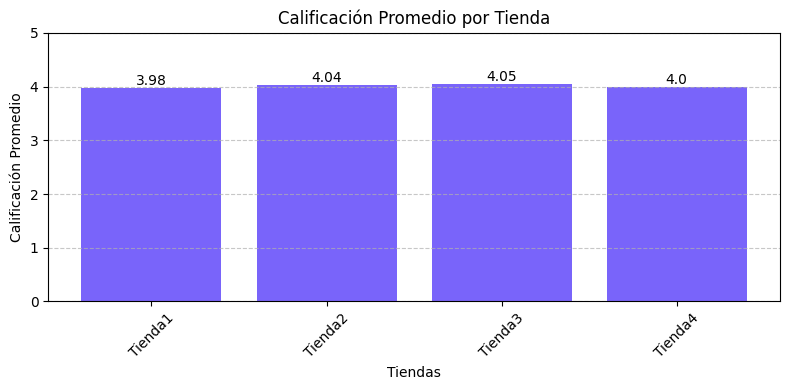

In [68]:
mejor_promedio = 0
calificacion_promedio_de_tiendas = []
calificaciones_promedio_por_tienda = {}
# Sumar las calificaciones de las tiendas
print('El promedio de calificaciones por tienda es de la siguiente manera: ')
for nombres_tiendas, tienda in enumerate(tiendas, start=1):
  print(f'\n\tTIENDA {nombres_tiendas}:')
  if 'Calificación' in tienda.columns:
    calificaciones_validas = tienda['Calificación'].dropna()

    #Sumamos todas las calificaciones
    suma_calificaciones = calificaciones_validas.sum()
    print(f'\nEl total de la calificación de la tienda es de: {suma_calificaciones} puntos')

    #Sacamos el promedio de las calificaciones
    promedio_calificaciones = calificaciones_validas.mean()
    print(f'\nEl promedio de calificaciones es: \n\t\t{promedio_calificaciones:.2f} estrellas')

    calificaciones_promedio_por_tienda[f'Tienda{nombres_tiendas}']=promedio_calificaciones

    #Sacamos el mejor promedio
    if promedio_calificaciones > mejor_promedio:
      mejor_promedio = promedio_calificaciones
      tienda_mejor_promedio = nombres_tiendas
  else:
    print('No hay calificaciones en esta tienda')


plt.figure(figsize=(8,4))
bars2 = plt.bar(calificaciones_promedio_por_tienda.keys(), calificaciones_promedio_por_tienda.values(),color='#7964FA')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.xticks(rotation=45)
plt.yticks([0,1,2,3,4,5])
plt.grid(axis='y', linestyle= '--', alpha=0.7)

for bar in bars2:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('promedio_calificaciones_por_tiendas.png')
plt.show()

# print(os.listdir())                                     #Asegurar que se guardara la imagen
# display(Image('grafico_facturacion_por_tiendas.png'))   #Verificamos que se muestre la imagen

In [70]:
#Evaluacion total de las tiendas
#Aun necesito revisar bien la operacion de la suma de calificaciones de las tiendas
#suma_calificaciones_global = sum(tienda['Calificación'].dropna())
#print(f'\nEl total de puntos de las tiendas es de: {suma_calificaciones_global}')
#promedio_calificaciones_global = suma_calificaciones_global / prueba_tiendas['Calificación'].dropna().count()
#print(f'Con un promedio de: {promedio_calificaciones_global:.2f}')


In [71]:
# Mejor promedio de calificaciones por tienda
print(f'\nLa tienda {tienda_mejor_promedio} contiene el mejor promedio de calificaciones.')
print(f'Con: {mejor_promedio:.2f} estrellas.')


La tienda 3 contiene el mejor promedio de calificaciones.
Con: 4.05 estrellas.


# 4. Productos más y menos vendidos

In [72]:
#Sacar de los productos mas vendidos y los menos vendidos por tienda
print(f'Los productos más vendidos por tienda son: ')
for nombres_tiendas, tienda in enumerate(tiendas, start=1):
  print(f'\n\tTIENDA {nombres_tiendas}:')
  if 'Categoría del Producto' in tienda.columns:
    contador_categorias_por_tienda = tienda['Categoría del Producto'].value_counts()
    if not contador_categorias_por_tienda.empty:
      categoria_mas_vendida = contador_categorias_por_tienda.idxmax()
      cantidad_mas_vendida = contador_categorias_por_tienda.max()
      categoria_menos_vendida = contador_categorias_por_tienda.idxmin()
      cantidad_menos_vendida = contador_categorias_por_tienda.min()
      print(f'El producto mas vendido es: \t{categoria_mas_vendida}.\ncon una cantidad de: \t\t{cantidad_mas_vendida} productos vendidos.')
      print(f'El producto menos vendido es: \t{categoria_menos_vendida}.\ncon una cantidad de: \t\t{cantidad_menos_vendida} productos vendidos')

    else:
      print('No hay categorias en esta tienda')

Los productos más vendidos por tienda son: 

	TIENDA 1:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		465 productos vendidos.
El producto menos vendido es: 	Artículos para el hogar.
con una cantidad de: 		171 productos vendidos

	TIENDA 2:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		442 productos vendidos.
El producto menos vendido es: 	Artículos para el hogar.
con una cantidad de: 		181 productos vendidos

	TIENDA 3:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		499 productos vendidos.
El producto menos vendido es: 	Instrumentos musicales.
con una cantidad de: 		177 productos vendidos

	TIENDA 4:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		480 productos vendidos.
El producto menos vendido es: 	Instrumentos musicales.
con una cantidad de: 		170 productos vendidos


In [79]:
# De la suma de todas las ventas de todas las tiendas, estos son los productos mas y menos vendidos
print('\nInformación de los productos de manera global:')
if not contador_categorias_global.empty:
  categoria_mas_vendida_global = contador_categorias_global.idxmax()
  cantidad_mas_vendida_global = contador_categorias_global.max()
  categoria_menos_vendida_global = contador_categorias_global.idxmin()
  cantidad_menos_vendida_global = contador_categorias_global.min()
print(f'El producto más vendido es: \t{categoria_mas_vendida_global}.\nProductos Vendidos: \t\t{cantidad_mas_vendida_global}.')
print(f'El producto menos vendido es: \t{categoria_menos_vendida_global}.\nProductos vendidos: \t\t{cantidad_menos_vendida_global}.')


Información de los productos de manera global:
El producto más vendido es: 	Muebles.
Productos Vendidos: 		1886.
El producto menos vendido es: 	Artículos para el hogar.
Productos vendidos: 		730.


# 5. Envío promedio por tienda


	TIENDA 1:
La tienda tuvo un total de 209 envios sin costo.
El envio más caro es: 	160800.0.
El envío mas barato es de: 		800.0.
El costo promedio de envio es de: 28547.86

	TIENDA 2:
La tienda tuvo un total de 214 envios sin costo.
El envio más caro es: 	162500.0.
El envío mas barato es de: 		800.0.
El costo promedio de envio es de: 27731.98

	TIENDA 3:
La tienda tuvo un total de 208 envios sin costo.
El envio más caro es: 	158400.0.
El envío mas barato es de: 		800.0.
El costo promedio de envio es de: 27204.37

	TIENDA 4:
La tienda tuvo un total de 196 envios sin costo.
El envio más caro es: 	154700.0.
El envío mas barato es de: 		800.0.
El costo promedio de envio es de: 25586.22


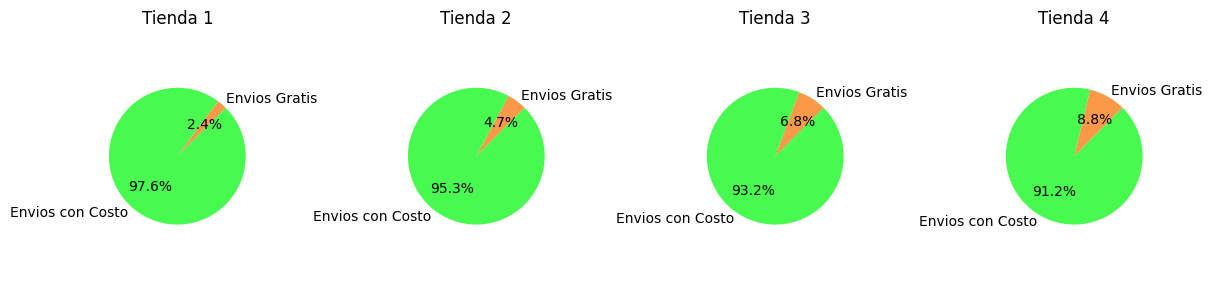


	El total de SUCURSALES
El costo promedio de envio global es de: 27264.99
Se hicieron: 8608 envios con costo
Se hicieron: 827 envios gratis


In [74]:
total_envios_gratis = 0
costo_global_envios = []
promedios_envio_por_tiendas = []
suma_costos_envios_por_tienda = []

fig, axs =plt.subplots(1,4, figsize=(12,3))
axs = axs.flatten()

#Costo de envio por tienda
for i,(nombres_tiendas, tienda) in enumerate(zip(range(1,5), tiendas[:4])):
  print(f'\n\tTIENDA {nombres_tiendas}:')
  if 'Costo de envío' in tienda.columns:
    costo_envio_tienda = tienda['Costo de envío'].dropna()
    envios_gratis = (costo_envio_tienda == 0).sum()
    envio_con_costo = costo_envio_tienda[costo_envio_tienda > 0]

    total_costo_envios = envio_con_costo.sum()
    suma_costos_envios_por_tienda.append(total_costo_envios)

    costo_global_envios.extend(envio_con_costo.tolist())
    total_envios_gratis += envios_gratis

# Figuras circulares
    labels =['Envios Gratis', 'Envios con Costo']
    values = [total_envios_gratis, total_envios_con_costo]
    colors = ['#FA9948','#48F94F']

    axs[i].pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45)
    axs[i].axis('equal')
    axs[i].set_title(f'Tienda {nombres_tiendas}')

#Fin de la figura

#Calculo de promedios de envio
    print(f'La tienda tuvo un total de {envios_gratis} envios sin costo.')


    if not costo_envio_tienda.empty:
      mayor_costo_envio =  envio_con_costo.max()
      menor_costo_envio =  envio_con_costo.min()
      promedio_costos_envio = envio_con_costo.mean()
      promedios_envio_por_tiendas.append(promedio_costos_envio)


      print(f'El envio más caro es: \t{mayor_costo_envio}.\nEl envío mas barato es de: \t\t{menor_costo_envio}.')
      print(f'El costo promedio de envio es de: {promedio_costos_envio:.2f}')

if costo_global_envios:
  costo_promedio_global_envios = sum(costo_global_envios) / len(costo_global_envios)

plt.tight_layout() #impresion de los graficos
plt.savefig('envios_4_tiendas.png')
plt.show()

total_envios_con_costo = len(costo_global_envios)


print('\n\tEl total de SUCURSALES')
print(f'El costo promedio de envio global es de: {costo_promedio_global_envios:.2f}')
print(f'Se hicieron: {total_envios_con_costo} envios con costo')
print(f'Se hicieron: {total_envios_gratis} envios gratis')

EL margen de ganancia de la Tienda es:

	TIENDA 1:
Facturacion Total: 1150880400.0
Costos totales de Envios: 61377900.0
Margen de Ganancia: 1089502500.0

	TIENDA 2:
Facturacion Total: 1116343500.0
Costos totales de Envios: 59485100.0
Margen de Ganancia: 1056858400.0

	TIENDA 3:
Facturacion Total: 1098019600.0
Costos totales de Envios: 58516600.0
Margen de Ganancia: 1039503000.0

	TIENDA 4:
Facturacion Total: 1038375700.0
Costos totales de Envios: 55317400.0
Margen de Ganancia: 983058300.0


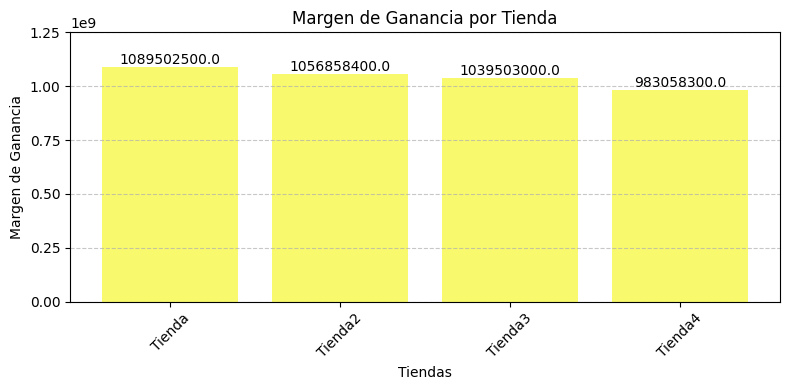

In [77]:
margen_de_ganacia_por_tienda = []
nombres_tiendas = ['Tienda', 'Tienda2', 'Tienda3', 'Tienda4']
for facturacion, costos_envio in zip(facturacion_por_tienda, suma_costos_envios_por_tienda):
  margen = facturacion - costos_envio
  margen_de_ganacia_por_tienda.append(margen)

print(f'EL margen de ganancia de la Tienda es:')
for i, (facturacion, costos_envio, margen) in enumerate(zip(facturacion_por_tienda, suma_costos_envios_por_tienda, margen_de_ganacia_por_tienda), start=1):
  print(f'\n\tTIENDA {i}:')
  print(f'Facturacion Total: {facturacion}')
  print(f'Costos totales de Envios: {costos_envio}')
  print(f'Margen de Ganancia: {margen}')

plt.figure(figsize=(8, 4))
bars4 = plt.bar(nombres_tiendas, margen_de_ganacia_por_tienda,color='#F9F96D')
plt.xlabel('Tiendas')
plt.ylabel('Margen de Ganancia')
plt.title('Margen de Ganancia por Tienda')
plt.xticks(rotation=45)
plt.yticks([0,250000000,500000000,750000000, 1000000000, 1250000000])
plt.grid(axis='y', linestyle= '--', alpha=0.7)

for bar in bars4:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('grafico_margen_ganancias_tiendas.png')
plt.show()

                            México, Ciduad de México a 21 de Abril de 2025
###**INFORME DE ANALISIS COMPARATIVO POR TIENDA**

#**Sr. Juan**
Directivo

En atención a la solicitud realizada al equipo, nos complace presentarle el siguiente análisis, con el objetivo de aportar información clave que facilite la toma de desiciones estratégicas.

Guiados por las primeras 3 gráficas, observamos que la información es muy similar para todas las tiendas. Sin embargo, con el proposito de obtener una visión más profunda, se incorporó un cuarto gráfico que analiza el margen de ganancia en relación con los costos de envío.

Principales hallazgos de los análisis:
*   Si se prioriza el **ingreso por facturación**, se debería considerar el **cierre de la Tienda 4**, mientras que en la **Tienda 1** sería importante mejorar la experiencia del cliente.
*   Si se prioriza la **experiencia del cliente**, se debería considerar el **cierra de la Tienda 1**, y buscar estrategías para **incrementar las ventas en la Tienda 4.**

Recomendación:

Nuestra sugerencia es proceder con el **cierre de la tienda 4**, priorizando el criterio de facturación. No obstante, se propone **aprovechar el personal de dicha tienda** para fortalecer y capacitar al equipo de la Tienda 1, con el fin de mejorar la experiencia del cliente.

**Nota adicional:**
Esta desición se plantea como una medida estratégica, orientada a la optimización de recursos y mejora del rendimiento general. Con la adecuada implementación, es posible lograr una pronta recuperación. Y en ese caso, no se descarta la posibilidad de **volver a invertir en una nueva tienda**, teniendo mejores condiciones y con aprendizajes adquiridos.

Agradecemos su atención y quedamos atentos para ampliar esta información o resolver cualquier inquietud adicional.

                    Atentamente
               Equipo de Data Science

                  Alejandro Alanis
        Jefe de departamento de Data Science

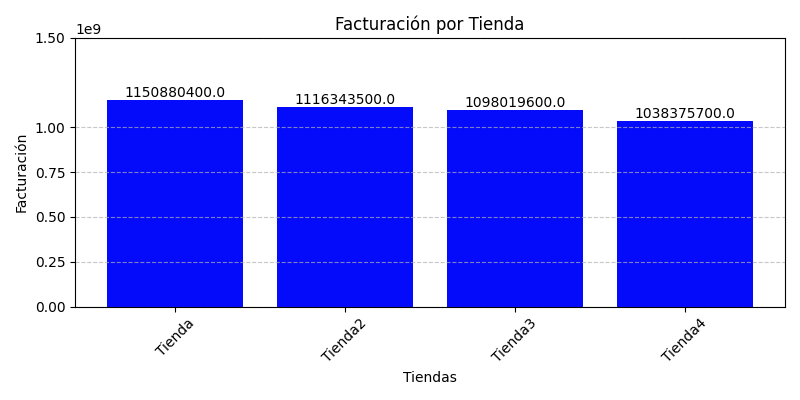

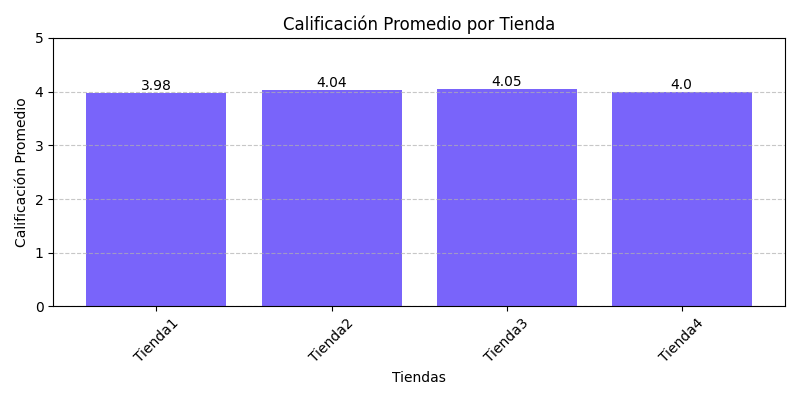

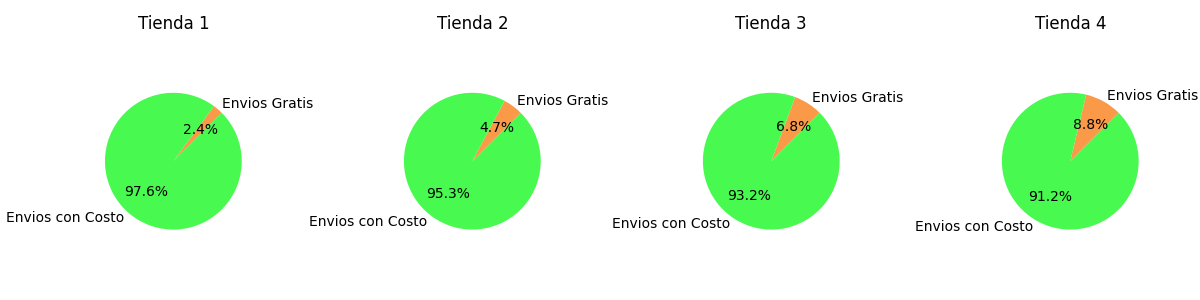

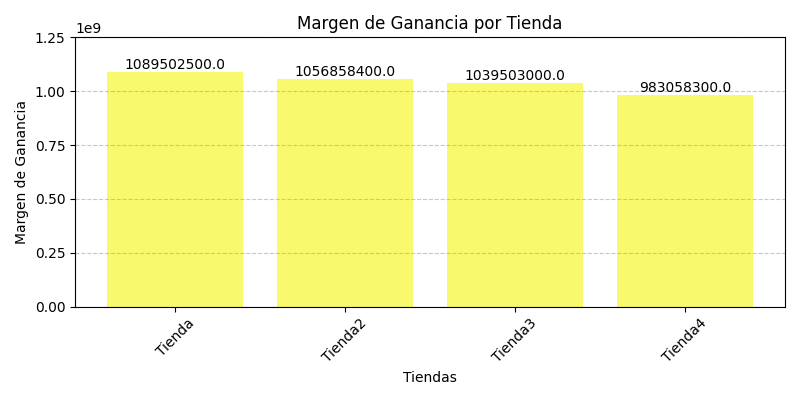

In [78]:
display(Image('grafico_facturacion_por_tiendas.png'))
display(Image('promedio_calificaciones_por_tiendas.png'))
display(Image('envios_4_tiendas.png'))
display(Image('grafico_margen_ganancias_tiendas.png'))

                            México, Ciduad de México a 21 de Abril de 2025
###***INFORMACIÓN DETALLADA DE:***
###**INFORME DE ANALISIS COMPARATIVO POR TIENDA**

Los ingresos totales de las tiendas.

*   Tienda 1:   1,150,880,400.0       MAYOR FACTURACION
*   Tienda 2:   1,116,343,500.0
*   Tienda 3:   1,098,019,600.0
*   Tienda 4:   1,038,375,700.0       MENOR FACTURACION


Las categorías de productos más y menos vendidas.

* La categoria mas vendida es: MUEBLES
* La categoria menos vendida es: ARTICULOS PARA EL HOGAR

Las calificaciones promedio de los clientes por tienda.

*   Tienda 1:   3.98       PEOR CALIFICACION
*   Tienda 2:   4.04
*   Tienda 3:   4.05       MEJOR CALIFICACION
*   Tienda 4:   4.00

Los productos más y menos vendidos.

*   Tienda 1:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		465 productos vendidos.
El producto menos vendido es: 	Artículos para el hogar.
con una cantidad de: 		171 productos vendidos
*   Tienda 2:   
El producto mas vendido es: 	Muebles.
con una cantidad de: 		442 productos vendidos.
El producto menos vendido es: 	Artículos para el hogar.
con una cantidad de: 		181 productos vendidos
*   Tienda 3:  
El producto mas vendido es: 	Muebles.
con una cantidad de: 		499 productos vendidos.
El producto menos vendido es: 	Instrumentos musicales.
con una cantidad de: 		177 productos vendidos
*   Tienda 4:
El producto mas vendido es: 	Muebles.
con una cantidad de: 		480 productos vendidos.
El producto menos vendido es: 	Instrumentos musicales.
con una cantidad de: 		170 productos vendidos

El coste de envío promedio para cada tienda.

*   Tienda 1:   28547.86       MAYOR COSTO DE ENVIO
*   Tienda 2:   27731.98
*   Tienda 3:   27204.37
*   Tienda 4:   25586.22       MENOR COSTO DE ENVIO

Margen de Ganancia (Facturacion total VS Costos de envio):

*   Tienda 1:   1,089,502,500.0      MAYOR MARGEN
*   Tienda 2:   1,056,858,400.0
*   Tienda 3:   1,039,503,000.0
*   Tienda 4:   983,058,300.0        MENOR MARGEN